In [1]:
import numpy as np
import pymc as pm
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from IPython.core.pylabtools import figsize
from mpl_toolkits.mplot3d import Axes3D

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Зачем нужно априорное распределение
Рассмотрим равномерное и экспоненциальное распределение

In [2]:
jet = plt.cm.jet

In [5]:
x = y = np.linspace(0,5,100)
X,Y = np.meshgrid(x, y)

In [6]:
uni_x = stats.uniform.pdf(x, loc=0, scale=5)
uni_y = stats.uniform.pdf(y, loc=0, scale=5)
M_UNI = np.dot(uni_x[:,None], uni_y[None,:])

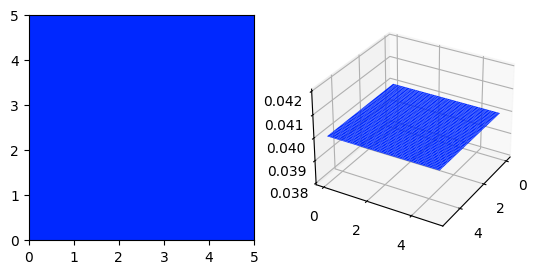

In [7]:
fig = plt.figure()
plt.subplot(121)

im = plt.imshow(M_UNI, cmap=jet, interpolation='none', origin='lower',
               vmax=1, vmin=-.15, extent=(0, 5, 0, 5))


ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X,Y,M_UNI, cmap=plt.cm.jet, vmax=1, vmin=-.15)
ax.view_init(azim=390)



In [8]:
exp_x = stats.expon.pdf(x, scale=3)
exp_y = stats.expon.pdf(y, scale=10)
M_EXP = np.dot(exp_x[:,None], exp_y[None,:])

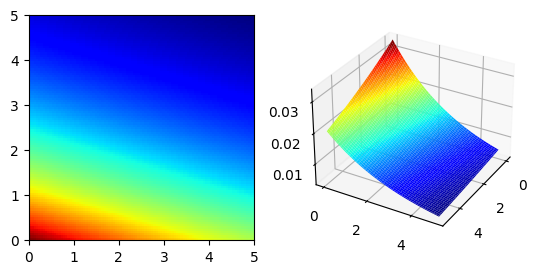

In [9]:
fig = plt.figure()
plt.subplot(121)

im = plt.imshow(M_EXP, interpolation='none', origin='lower',
                cmap=jet, extent=(0, 5, 0, 5))


ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X,Y,M_EXP, cmap=plt.cm.jet)
ax.view_init(azim=390)



## Создаем наблюдаемые данные

In [16]:
N = 2

# Мы не знаем реальных параметров распределения, это гипотетический пример
lambda_1_true = 1
lambda_2_true = 3

In [21]:
data = np.c_[
    stats.poisson.rvs(lambda_1_true, size=(N,1)),
    stats.poisson.rvs(lambda_2_true, size=(N,1))
]

print(data)

[[1 1]
 [0 4]]


>Посчитаем правдоподобие встретить такие данные для каждого возможного значения lambda 1 и lambda 2

In [22]:
x = y = np.linspace(.01, 5, 100)

In [23]:
likelihood_x = np.array([stats.poisson.pmf(data[:,0], _x) for _x in x]).prod(axis=1)
likelihood_y = np.array([stats.poisson.pmf(data[:,1], _y) for _y in y]).prod(axis=1)
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

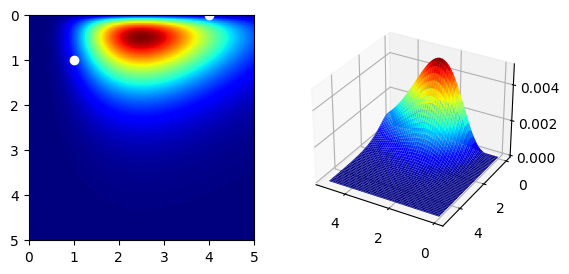

In [24]:
fig = plt.figure()
plt.subplot(121)

im = plt.imshow(L, extent=(0,5,5,0) , cmap=plt.cm.jet)
plt.scatter(data[:,1], data[:,0], c="w")


ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X,Y,L, cmap=plt.cm.jet)
ax.view_init(azim=120)

# Деформированный данными априорный ландшафт

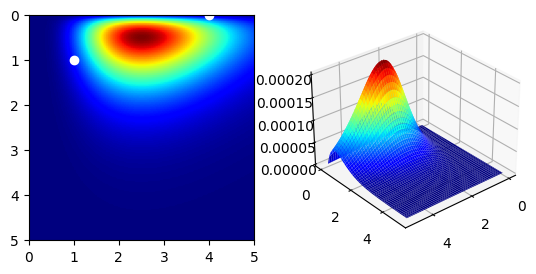

In [25]:
fig = plt.figure()
plt.subplot(121)

im = plt.imshow(L * M_UNI, extent=(0,5,5,0), cmap=plt.cm.jet)
plt.scatter(data[:,1], data[:,0], c="w")


ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X,Y,L * M_UNI, cmap=plt.cm.jet)
ax.view_init(azim=50)

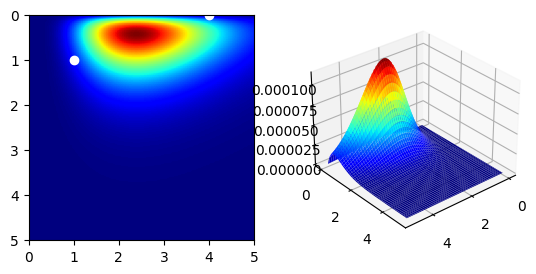

In [26]:
fig = plt.figure()
plt.subplot(121)

im = plt.imshow(L * M_EXP, extent=(0,5,5,0), cmap=plt.cm.jet)
plt.scatter(data[:,1], data[:,0], c="w")


ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X,Y,L * M_EXP, cmap=plt.cm.jet)
ax.view_init(azim=50)